In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

import tensorflow as tf
import os

import matplotlib.pyplot as plt
%matplotlib inline

from keras.preprocessing.image import ImageDataGenerator
from random import shuffle
import cv2
import numpy as np
import pandas as pd

C:\Users\nataw\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\nataw\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\nataw\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\nataw\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [ ]:
data_path = "E:\\Drowsiness\\Data_CNN\\"
train_dir = os.path.join(data_path,"train")
validation_dir = os.path.join(data_path,"validation")

In [ ]:
data_gen_train = ImageDataGenerator(rescale=1/255.,
        rotation_range=0.5,
        shear_range=0.2,
        zoom_range=0.2,)
data_gen_valid = ImageDataGenerator(rescale=1/255.)

In [ ]:
train_gen = data_gen_train.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')
valid_gen = data_gen_train.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')

Data

In [2]:

#image_paths = 'E:/Drowsiness/Data_CNN/train/alert/'
img_size = 224
def load_images_from_folder(image_paths):
    images = []
    for filename in os.listdir(image_paths):
        img = cv2.imread(os.path.join(image_paths,filename))
        if img is not None:
            img = cv2.resize(img,(img_size,img_size))
            images.append([np.array(img),[1,0]])
    shuffle(images)
    return images


In [3]:
#image_paths = 'E:/Drowsiness/Data_CNN/train/drowsy/'
img_size = 224
def load_images_from_folder2(image_paths):
    images = []
    for filename in os.listdir(image_paths):
        img = cv2.imread(os.path.join(image_paths,filename))
        if img is not None:
            img = cv2.resize(img,(img_size,img_size))
            images.append([np.array(img),[0,1]])
    shuffle(images)
    return images


In [31]:
image_paths = 'E:/Drowsiness/Data_CNN/train/alert/'
train_data = load_images_from_folder(image_paths)

In [5]:
train_data

[[array([[[130, 131, 129],
          [130, 131, 129],
          [131, 132, 130],
          ...,
          [ 85,  86,  84],
          [ 85,  86,  84],
          [ 85,  86,  84]],
  
         [[130, 131, 129],
          [130, 131, 129],
          [131, 132, 130],
          ...,
          [ 87,  88,  86],
          [ 87,  88,  86],
          [ 87,  88,  86]],
  
         [[130, 131, 129],
          [130, 131, 129],
          [131, 132, 130],
          ...,
          [ 88,  89,  87],
          [ 88,  89,  87],
          [ 88,  89,  87]],
  
         ...,
  
         [[156, 135, 134],
          [ 76,  51,  46],
          [ 80,  35,  25],
          ...,
          [153, 152, 142],
          [153, 152, 142],
          [153, 152, 142]],
  
         [[220, 188, 186],
          [175, 147, 138],
          [ 76,  39,  26],
          ...,
          [152, 150, 140],
          [152, 150, 140],
          [152, 150, 140]],
  
         [[126,  83,  81],
          [132, 101,  91],
          [ 85,  56,  40

In [32]:
image_paths = 'E:/Drowsiness/Data_CNN/train/drowsy/'
train_data2 = load_images_from_folder2(image_paths)

In [33]:
train_data = np.concatenate((train_data, train_data2), axis=0)

In [39]:
train_data.shape

AttributeError: 'int' object has no attribute 'shape'

In [35]:
shuffle(train_data)

In [10]:
X_train = np.array([i[0] for i in train_data]).reshape(-1,img_size,img_size,3)/255

In [11]:
X_train.shape

(2562, 224, 224, 3)

In [12]:
y_train = np.array([i[1] for i in train_data])

In [38]:
train_data = 0
train_data2 = 0

In [29]:
train_data

0

In [14]:
image_paths = 'E:/Drowsiness/Data_CNN/validation/alert/'
valid_data = load_images_from_folder(image_paths)

In [15]:
image_paths = 'E:/Drowsiness/Data_CNN/validation/drowsy/'
valid_data2 = load_images_from_folder2(image_paths)

In [16]:
valid_data = np.concatenate((valid_data, valid_data2), axis=0)

In [17]:
valid_data.shape
shuffle(valid_data)

In [18]:
X_valid = np.array([i[0] for i in valid_data]).reshape(-1,img_size,img_size,3)/255

In [19]:
y_valid = np.array([i[1] for i in valid_data])

In [ ]:
for i in y_valid:
    if i[1] == 0:
        print(i)

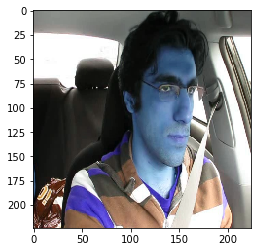

In [20]:
plt.imshow(X_train[1])

In [30]:
valid_data.shape

(673, 2)

In [36]:
np.save("train_data.npy",train_data)
np.save("valid_data.npy",valid_data)

<h1>Load Model</h1>

In [21]:
base_model = tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=(224,224,3),
    weights="imagenet")

C:\Users\nataw\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [22]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [23]:
base_model.trainable = False

<h1>Add Custom Head</h1>

In [24]:
averge_pooling_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
prediction_layer = tf.keras.layers.Dense(units=2,activation = 'softmax')(averge_pooling_layer)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [25]:
model = tf.keras.models.Model(inputs=base_model.input,outputs = prediction_layer)

In [26]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
______________________________________________________________________________________________

<h1>Train Model</h1>

In [27]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
tf.debugging.set_log_device_placement(True)
model.fit(X_train,y_train,epochs=25,validation_data=(X_valid,y_valid),batch_size=32)

Train on 2562 samples, validate on 673 samples
Epoch 1/25
2562/2562 [==============================] - 34s 13ms/sample - loss: 0.4308 - acc: 0.8349 - val_loss: 0.6808 - val_acc: 0.5097
Epoch 2/25
2562/2562 [==============================] - 33s 13ms/sample - loss: 0.3437 - acc: 0.8618 - val_loss: 0.6837 - val_acc: 0.4651
Epoch 3/25
2562/2562 [==============================] - 33s 13ms/sample - loss: 0.3040 - acc: 0.8849 - val_loss: 0.7472 - val_acc: 0.1961
Epoch 4/25
2562/2562 [==============================] - 33s 13ms/sample - loss: 0.2702 - acc: 0.8997 - val_loss: 0.7596 - val_acc: 0.1798
Epoch 5/25
2562/2562 [==============================] - 33s 13ms/sample - loss: 0.2517 - acc: 0.9087 - val_loss: 0.7595 - val_acc: 0.1813
Epoch 6/25
2562/2562 [==============================] - 33s 13ms/sample - loss: 0.2329 - acc: 0.9133 - val_loss: 0.7546 - val_acc: 0.1976
Epoch 7/25
2562/2562 [==============================] - 33s 13ms/sample - loss: 0.2194 - acc: 0.9157 - val_loss: 0.8204 - val

In [42]:
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [40]:
image_paths = 'E:/Drowsiness/Data_CNN/test/alert/'
test_data = load_images_from_folder(image_paths)

In [41]:
test_data

[[array([[[164, 179, 171],
          [155, 170, 162],
          [152, 165, 157],
          ...,
          [127, 182, 169],
          [121, 183, 169],
          [101, 181, 164]],
  
         [[193, 210, 199],
          [191, 207, 196],
          [189, 205, 194],
          ...,
          [105, 167, 153],
          [107, 170, 156],
          [105, 181, 165]],
  
         [[131, 147, 136],
          [132, 146, 135],
          [132, 146, 135],
          ...,
          [106, 176, 161],
          [108, 173, 158],
          [ 99, 167, 152]],
  
         ...,
  
         [[189, 150,  75],
          [185, 146,  71],
          [177, 138,  62],
          ...,
          [187, 201, 227],
          [200, 213, 239],
          [194, 208, 231]],
  
         [[189, 150,  75],
          [185, 146,  71],
          [174, 135,  60],
          ...,
          [189, 205, 235],
          [178, 195, 224],
          [178, 195, 223]],
  
         [[187, 148,  74],
          [183, 144,  69],
          [173, 134,  59

In [43]:
image_paths = 'E:/Drowsiness/Data_CNN/test/drowsy/'
test_data2 = load_images_from_folder2(image_paths)

In [44]:
test_data = np.concatenate((test_data, test_data2), axis=0)

In [45]:
shuffle(test_data)

In [46]:
test_data

array([[array([[[164, 179, 171],
        [155, 170, 162],
        [152, 165, 157],
        ...,
        [127, 182, 169],
        [121, 183, 169],
        [101, 181, 164]],

       [[193, 210, 199],
        [191, 207, 196],
        [189, 205, 194],
        ...,
        [105, 167, 153],
        [107, 170, 156],
        [105, 181, 165]],

       [[131, 147, 136],
        [132, 146, 135],
        [132, 146, 135],
        ...,
        [106, 176, 161],
        [108, 173, 158],
        [ 99, 167, 152]],

       ...,

       [[189, 150,  75],
        [185, 146,  71],
        [177, 138,  62],
        ...,
        [187, 201, 227],
        [200, 213, 239],
        [194, 208, 231]],

       [[189, 150,  75],
        [185, 146,  71],
        [174, 135,  60],
        ...,
        [189, 205, 235],
        [178, 195, 224],
        [178, 195, 223]],

       [[187, 148,  74],
        [183, 144,  69],
        [173, 134,  59],
        ...,
        [145, 165, 199],
        [141, 162, 195],
        [133, 15

In [47]:
X_test = np.array([i[0] for i in test_data]).reshape(-1,img_size,img_size,3)/255

In [48]:
X_test.shape

(636, 224, 224, 3)

In [49]:
y_test = np.array([i[1] for i in test_data])

In [50]:
y_test.shape

(636, 2)

In [51]:

metrics = pd.DataFrame(model.history.history)
metrics

,loss,acc,val_loss,val_acc
0,0.430812,0.834895,0.680846,0.509658
1,0.343682,0.861827,0.683701,0.465082
2,0.303968,0.884856,0.747154,0.196137
3,0.270227,0.899688,0.759586,0.179792
4,0.251682,0.908665,0.759474,0.181278
5,0.232948,0.913349,0.754613,0.197623
6,0.219446,0.915691,0.820366,0.145617
7,0.211369,0.925449,0.835345,0.145617
8,0.198824,0.924278,0.835264,0.145617
9,0.192165,0.928962,0.851444,0.145617


In [52]:
model.save('Tranfer_Model.h5')

In [53]:
from sklearn.metrics import classification_report
prediction = model.predict(X_test)


#print(classification_report(y_test, y_pred1))

In [60]:
y_pred1 = np.argmax(prediction,axis=1)

In [61]:
y_pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [55]:
prediction[0]

array([0.25909808, 0.7409019 ], dtype=float32)

In [62]:
y_test

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

<h1>Fine Tuning<h1>

In [64]:
len(base_model.layers)

175

In [66]:
base_model.trainable = True

In [67]:
for layer in base_model.layers[:125]:
    layer.trainable = False

In [68]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [69]:
tf.debugging.set_log_device_placement(True)
model.fit(X_train,y_train,epochs=25,validation_data=(X_valid,y_valid),batch_size=32)

Train on 2562 samples, validate on 673 samples
Epoch 1/25
2562/2562 [==============================] - 43s 17ms/sample - loss: 0.0948 - acc: 0.9688 - val_loss: 3.0200 - val_acc: 0.1456
Epoch 2/25
2562/2562 [==============================] - 42s 16ms/sample - loss: 0.0148 - acc: 0.9965 - val_loss: 2.3580 - val_acc: 0.1456
Epoch 3/25
2562/2562 [==============================] - 42s 16ms/sample - loss: 0.0094 - acc: 0.9969 - val_loss: 1.9634 - val_acc: 0.1456
Epoch 4/25
2562/2562 [==============================] - 42s 16ms/sample - loss: 0.0025 - acc: 0.9996 - val_loss: 2.3498 - val_acc: 0.1456
Epoch 5/25
2562/2562 [==============================] - 42s 16ms/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 3.3418 - val_acc: 0.1456
Epoch 6/25
2562/2562 [==============================] - 42s 17ms/sample - loss: 0.0098 - acc: 0.9969 - val_loss: 6.0006 - val_acc: 0.1456
Epoch 7/25
2562/2562 [==============================] - 42s 16ms/sample - loss: 0.0013 - acc: 0.9996 - val_loss: 5.7568 - val